In [5]:
import pandas as pd
from pandas_datareader import data as web

In [7]:
#pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as  mpf

In [3]:
def save_to_csv_from_yahoo(ticker, syear,smonth,sday,eyear, emonth,eday):
        start = dt.datetime(syear,smonth,sday)
        end = dt.datetime(eyear,emonth,eday)
        
        df = web.DataReader(ticker,'yahoo',start,end)
        
        df.to_csv("D:/FinAnalysis" + ticker +'.csv')
        return df

In [6]:
save_to_csv_from_yahoo('AMZN',2020,1,1,2021,1,1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
...,...,...,...,...,...,...
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000


In [7]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("D:/FinAnalysis" + ticker +'.csv')
    except FileNotFoundError:
        print("File doesnt exist")
    else:
        return df

In [9]:
AMZN  = get_df_from_csv('AMZN')
AMZN

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966
1,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
3,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
4,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
...,...,...,...,...,...,...,...
249,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
250,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
251,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000
252,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098


In [10]:
#Add daily return to df
#Simple rate of return = (End Price - Beginning price) / Beginning Price OR [(EP/BP)-1]
def add_daily_return_to_df(df,ticker):
    df['daily_return'] =(df['Adj Close'] / df['Adj Close'].shift(1))-1
    df.to_csv("D:/FinAnalysis" + ticker +'.csv')
    return df

In [11]:
add_daily_return_to_df(AMZN,'AMZN')

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966,NaN
1,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0.027151
2,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-0.012139
3,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,0.014886
4,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,0.002092
...,...,...,...,...,...,...,...,...
249,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,-0.003949
250,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,0.035071
251,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,0.011584
252,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,-0.010882


In [12]:
def get_return_defined_time(df,syear,smonth,sday,eyear, emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret =df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days * daily_ret)

In [13]:
tot_ret = get_return_defined_time(AMZN,2020,1,1,2021,1,1)
print("TOtal Return: ", tot_ret)

TOtal Return:  0.6413534880927203


In [18]:
#matplotliv finance

def mplfinance_plot(ticker,chart_type,syear,smonth,sday,eyear, emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv("D:/FinAnalysis" + ticker +'.csv')
    except FileNotFoundError:
        print("File doesnt exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub,type='candle')
        mpf.plot(df_sub,type='line')
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        s = mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size':8})
        fig = mpf.figure(figsize=(12,8),style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2,sharex=ax)
        mpf.plot(df_sub,type=chart_type,mav=(3,5,7),ax=ax,volume=av,show_nontrading=True)

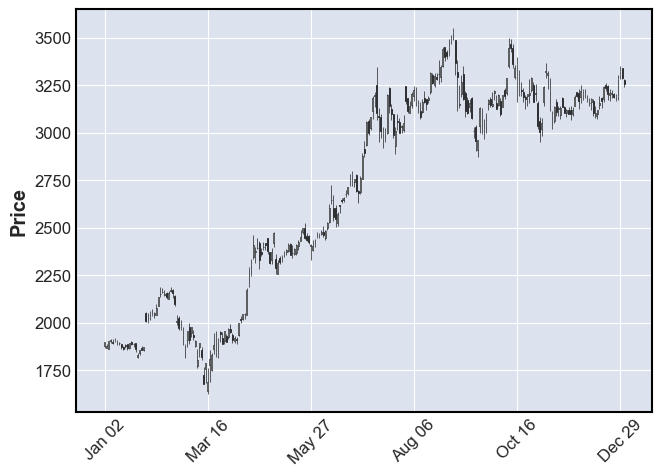

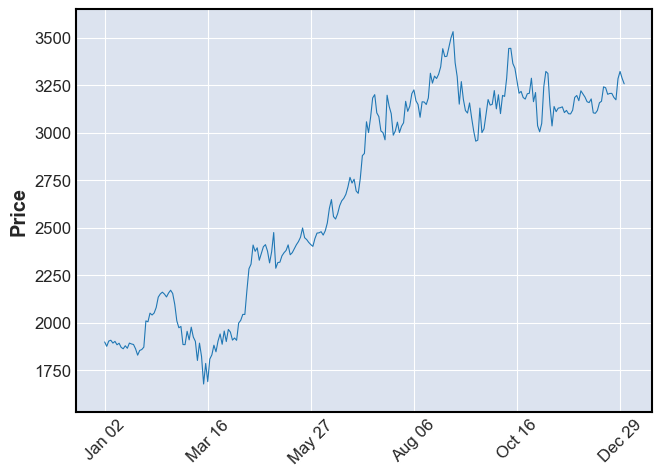

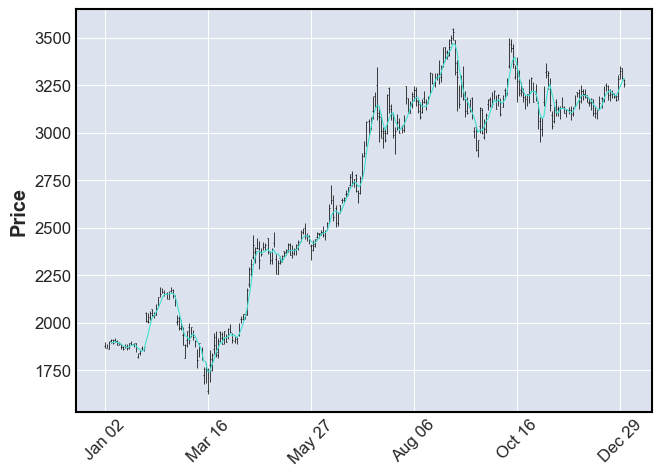

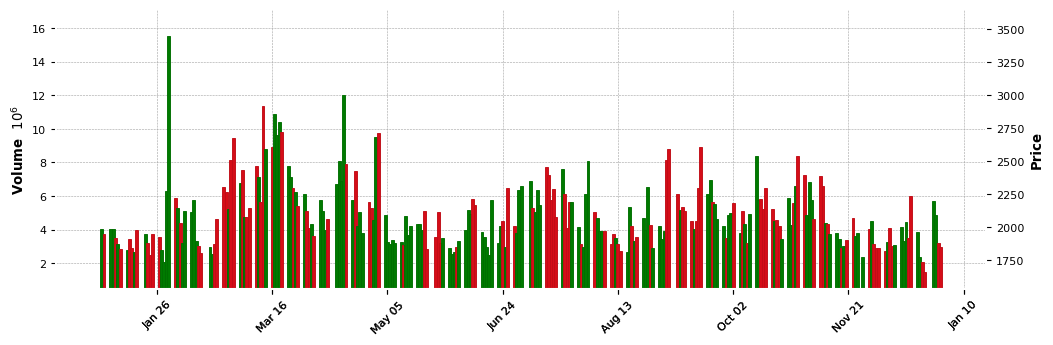

In [19]:
mplfinance_plot('AMZN','ohlc',2020,1,1,2021,1,1)